# Multiseed Samudra Plots

This notebooks contains timeseries plots and RMSE plot

### Imports

In [1]:
import sys
sys.path.append("../samudra/")

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
from xarrayutils.plotting import linear_piecewise_scale
from dask.diagnostics import ProgressBar
from datetime import datetime

### Data

In [3]:

# Replace with appropriate paths
#### 
# Seeds
####
start = 2903
end = 3503
perturbed_date = False
pred_dict = {
   "pred_1": {
        "name": "Seed1",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-10-30_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Hist1NofastinoutEpochs70Epoch55_seed5_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo"
    },
    "pred_2": {
        "name": "Seed2",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-10-30_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Hist1NofastinoutEpochs70Epoch55_seed10_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo"
    },
    "pred_3": {
        "name": "Seed3",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-09-20_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975NofastinoutEpochs70Epoch55_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo"
    },
    "pred_4": {
        "name": "Seed4",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-04_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Hist1NofastinoutEpochs70Epoch55_seed3_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo"
    },
    "pred_5": {
        "name": "Seed5",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-04_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Hist1NofastinoutEpochs70Epoch55_seed1_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo"
    },
   "pred_6": {
        "name": "Seed1",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-10-31_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_seed5_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo_dynamic"
    },
    "pred_7": {
        "name": "Seed2",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-10-31_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_seed10_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo_dynamic"
    },
    "pred_8": {
        "name": "Seed3",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-09-20_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo_dynamic"
    },
    "pred_9": {
        "name": "Seed4",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-04_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_seed3_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo_dynamic"
    },
    "pred_10": {
        "name": "Seed5",
        "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-04_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_seed1_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
        "mode": "thermo_dynamic"
    }
}
path_prefix = "HFDS_HFDS_Anoms"
levels = 19


#### 
# Perturbed date
####
# start = 2903
# end = 3467
# perturbed_date = True

# slow
# pred_dict = {
#    "pred_1": {
#         "name": "2014-10-10",
#         "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-09-20_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975NofastinoutEpochs70Epoch55_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
#         "mode": "thermo",
#        "start": 0,
#        "end": 564
       
#     },
#     "pred_2": {
#         "name": "2014-04-13",
#         "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-02_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Hist1NofastinoutEpochs70Epoch55_seed15_Nval14_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
#         "mode": "thermo",
#         "start": 36,
#        "end": 600
#     }
# }
# path_prefix = "HFDS_HFDS_Anoms_Slow_PertubDates"

# all
# pred_dict = {
#    "pred_1": {
#         "name": "2014-10-10",
#         "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-09-20_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
#         "mode": "thermo_dynamic",
#        "start": 0,
#        "end": 564
       
#     },
#     "pred_2": {
#         "name": "2014-04-13",
#         "path": "/pscratch/sd/s/suryad/Ocean_Emulator/Preds/2024-11-02_ConvNextUNetTrain3Dv021Eval3Dhfdsanoms1975Epochs70Epoch55_seed15_Nval14_Train_global_3D_Test_global_3D_all_N_train_2850_Lateral_Data_025_no_smooth/Pred_lateral_Fast_Data_025_global_3D_all_N_samples_2850_rand_seed_1.zarr",
#         "mode": "thermo_dynamic",
#         "start": 36,
#        "end": 600
#     }
# }
# path_prefix = "HFDS_HFDS_Anoms_All_PertubDates"


In [4]:
import os
import json
import pandas as pd
import copy
from utils import convert_train_data, post_processor 

data = xr.open_dataset("https://nyu1.osn.mghpcc.org/m2lines-pubs/Samudra/OM4", engine='zarr', chunks={})

ds_groundtruth = data.isel(time=slice(start, end))
ds_groundtruth = convert_train_data(ds_groundtruth)

output_path = "../outputs/" + str(datetime.now())[:10] + '_' + path_prefix + '_' + '_'.join([pred_dict[k]["name"] for k in pred_dict.keys()])
print("Using Output Folder : ", output_path)
if not os.path.isdir(os.path.join(output_path)):
    os.makedirs(os.path.join(output_path))
    
compare_info_dict = copy.deepcopy(pred_dict)
    
for k in pred_dict.keys():
    if pred_dict[k]['mode'] == 'thermo':
        pred_dict[k]["ls"] = ['thetao', 'so', 'zos']
    else:
        pred_dict[k]["ls"] = ['uo', 'vo', 'thetao', 'so', 'zos']

    Pred_path = pred_dict[k]['path']
    ds_prediction_raw = xr.open_zarr(Pred_path)

    if perturbed_date:
        ds_prediction_raw = ds_prediction_raw.isel(time=slice(pred_dict[k]["start"],pred_dict[k]["end"]))

    ds_prediction = post_processor(
        ds_prediction_raw, ds_groundtruth, pred_dict[k]["ls"] # You can skip this step if you have already run post processing
    )
    
    pred_dict[k]["ds_prediction"] = ds_prediction

Using Output Folder :  ../outputs/2024-12-08_HFDS_HFDS_Anoms_Seed1_Seed2_Seed3_Seed4_Seed5_Seed1_Seed2_Seed3_Seed4_Seed5


In [5]:
%matplotlib inline

In [6]:
def profile_mean(ds: xr.Dataset) -> xr.Dataset:
    return ds.weighted(ds.areacello).mean(["x", "y"])

In [7]:
with ProgressBar():
    print("Ground truth OM4")
    ds_groundtruth = ds_groundtruth.assign(KE=0.5 * (ds_groundtruth.uo ** 2 + ds_groundtruth.vo ** 2)*1020)
    profile_groundtruth = profile_mean(ds_groundtruth).load()
    
    for k in pred_dict.keys():
        print(k)
        if 'uo' in pred_dict[k]["ls"]:
            pred_dict[k]["ds_prediction"] = pred_dict[k]["ds_prediction"].assign(KE=0.5 * (pred_dict[k]["ds_prediction"].uo ** 2 + pred_dict[k]["ds_prediction"].vo ** 2)*1020)
            pred_dict[k]["ls"].append('KE')
        pred_dict[k]["profile_prediction"] = profile_mean(pred_dict[k]["ds_prediction"]).load()

Ground truth OM4
[########################################] | 100% Completed | 449.39 s
pred_1
[########################################] | 100% Completed | 11.40 s
pred_2
[########################################] | 100% Completed | 11.27 s
pred_3
[########################################] | 100% Completed | 11.53 s
pred_4
[########################################] | 100% Completed | 11.23 s
pred_5
[########################################] | 100% Completed | 11.50 s
pred_6
[########################################] | 100% Completed | 30.52 s
pred_7
[########################################] | 100% Completed | 30.26 s
pred_8
[########################################] | 100% Completed | 36.52 s
pred_9
[########################################] | 100% Completed | 31.07 s
pred_10
[########################################] | 100% Completed | 30.59 s


In [8]:
# clist = ["#992b2b", "#752f7b", "#4983b3", "#a3dfcc", "#dfa3d8"]
clist = ["#ff807a","#1e8685","#ffb579","#63c8ab","#dfa3d8"]


var_list = {
        "vo": r"$v$ $( m/s )$",
        "uo": r"$u$ $( m/s )$",
        "thetao": r"$thetao$ $( ^\circ C )$",
        "so": r"$so$ $( psu )$",
        "zos": r"$zos$ $( m )$",
        "KE": r"$KE$ $( J/m^2 )$",
    }

only_units_list = {
        "vo": r"$( m/s )$",
        "uo": r"$( m/s )$",
        "thetao": r"$( ^\circ C )$",
        "so": r"$( psu )$",
        "zos": r"$( m )$",
        "KE": r"$( J/m^2 )$",
    }

### Plots

In [9]:
# Helper function to calculate mean and std across seeds
def compute_mean_std(predictions):
    stacked = np.stack(predictions, axis=0)
    return np.mean(stacked, axis=0), np.std(stacked, axis=0)

#### Figure 2a)

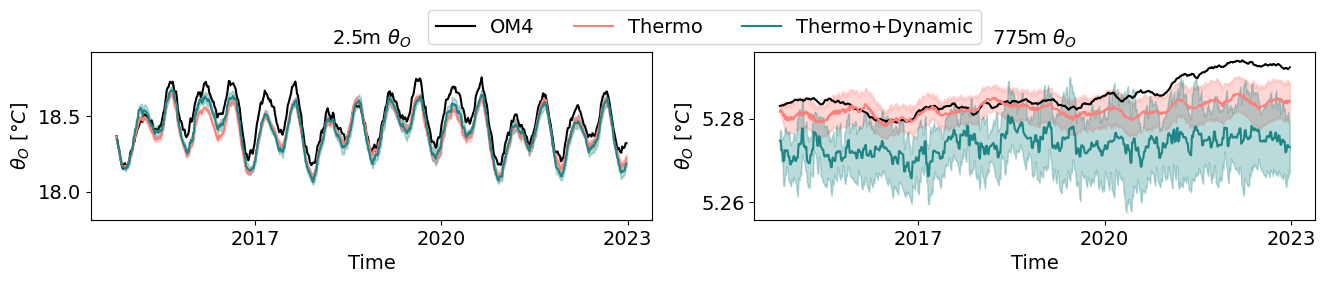

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

shallow_levels = [2.5, 775]
num_shallow_levels = len(shallow_levels)

plt.rcParams.update({'font.size': 14})

num_plots = 0
for var in ['thetao']:
    if 'lev' in pred_dict[k]["ds_prediction"][var].coords:
        num_plots += num_shallow_levels  # One plot per level
    else:
        num_plots += 1  # One plot for scalar variables

# Set grid size dynamically based on the number of required plots
cols = 2  # Number of columns
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(16, 3))
axes = axes.flatten()  # Flatten the 2D array of axes for easy access

plot_idx = 0  # Initialize plot index to track subplot positions

# Loop over each variable to plot its time series
for v in ['thetao']:
    if v == 'zos':
        ax = axes[plot_idx]
        
        # Ground truth plot
        profile_groundtruth[v].plot(ax=ax, label='OM4', c='k')
        min_val = profile_groundtruth[v].min()
        max_val = profile_groundtruth[v].max()

        # Collect predictions across seeds
        slow_predictions = [
            pred_dict[k]["profile_prediction"][v].values
            for k in pred_dict.keys() if pred_dict[k]["mode"]=="slow"
        ]
        all_predictions = [
            pred_dict[k]["profile_prediction"][v].values
            for k in pred_dict.keys() if pred_dict[k]["mode"]=="all"
        ]
        slow_mean_pred, slow_std_pred = compute_mean_std(slow_predictions)
        all_mean_pred, all_std_pred = compute_mean_std(all_predictions)

        # Plot mean line and fill standard deviation
        times = profile_groundtruth[v].time.values

        ax.plot(times, slow_mean_pred, label='Slow', c=clist[0])
        ax.fill_between(times, slow_mean_pred - slow_std_pred, slow_mean_pred + slow_std_pred, color=clist[0], alpha=0.3)

        ax.plot(times, all_mean_pred, label='Slow+Fast', c=clist[1])
        ax.fill_between(times, all_mean_pred - all_std_pred, all_mean_pred + all_std_pred, color=clist[1], alpha=0.3)

        ax.set_ylim(min_val - 0.05, max_val + 0.05)
        ax.set_title(f"{v}")
        ax.set_xlabel('Time')
        ax.set_ylabel(var_list[v])

        plot_idx += 1

    else:
        for lev in shallow_levels:
            ax = axes[plot_idx]
            
            # Ground truth plot
            profile_groundtruth[v].sel(lev=lev).plot(ax=ax, label='OM4', c='k')

            # Collect predictions across seeds
            slow_predictions = [
                pred_dict[k]["profile_prediction"][v].sel(lev=lev).values
                for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo"
            ]
            all_predictions = [
                pred_dict[k]["profile_prediction"][v].sel(lev=lev).values
                for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo_dynamic"
            ]
            slow_mean_pred, slow_std_pred = compute_mean_std(slow_predictions)
            all_mean_pred, all_std_pred = compute_mean_std(all_predictions)

            # Plot mean line and fill standard deviation
            times = profile_groundtruth[v].time.values

            ax.plot(times, slow_mean_pred, label='Thermo', c=clist[0])
            ax.fill_between(times, slow_mean_pred - slow_std_pred, slow_mean_pred + slow_std_pred, color=clist[0], alpha=0.3)
            
            ax.plot(times, all_mean_pred, label='Thermo+Dynamic', c=clist[1])
            ax.fill_between(times, all_mean_pred - all_std_pred, all_mean_pred + all_std_pred, color=clist[1], alpha=0.3)

            # Adjust y-axis limits
            if v == 'thetao':
                if lev > 100:
                    mins = min(slow_mean_pred.min(), all_mean_pred.min())
                    maxs = max(slow_mean_pred.max(), all_mean_pred.max())
                    ax.set_ylim(mins - 0.01, maxs + 0.01)
                else:
                    mins = min(slow_mean_pred.min(), all_mean_pred.min())
                    maxs = max(slow_mean_pred.max(), all_mean_pred.max())
                    ax.set_ylim(mins - 0.25, maxs + 0.25)
            elif v == 'so':
                mins = min(slow_mean_pred.min(), all_mean_pred.min())
                maxs = max(slow_mean_pred.max(), all_mean_pred.max())
                ax.set_ylim(mins - 0.2, maxs + 0.2)

            ax.set_title(f"{lev}m"+ r" $\theta_O$", fontsize=14)
            ax.set_xlabel('Time')
            ax.set_ylabel(r"$\theta_O$ [$\degree C$]")

            plot_idx += 1
            if plot_idx >= rows * cols:
                break

# Adjust layout to avoid overlap and place the legend outside the plot
fig.tight_layout(rect=[0, 0, 0.85, 0.96])

# Create a single legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.455, 0.8), ncols=3)

# Remove any empty subplots
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

# Save the figure
output_file = os.path.join(output_path, "temperature_timeseries_grid_shallow_mean_std_both.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600)

#### Figure S8

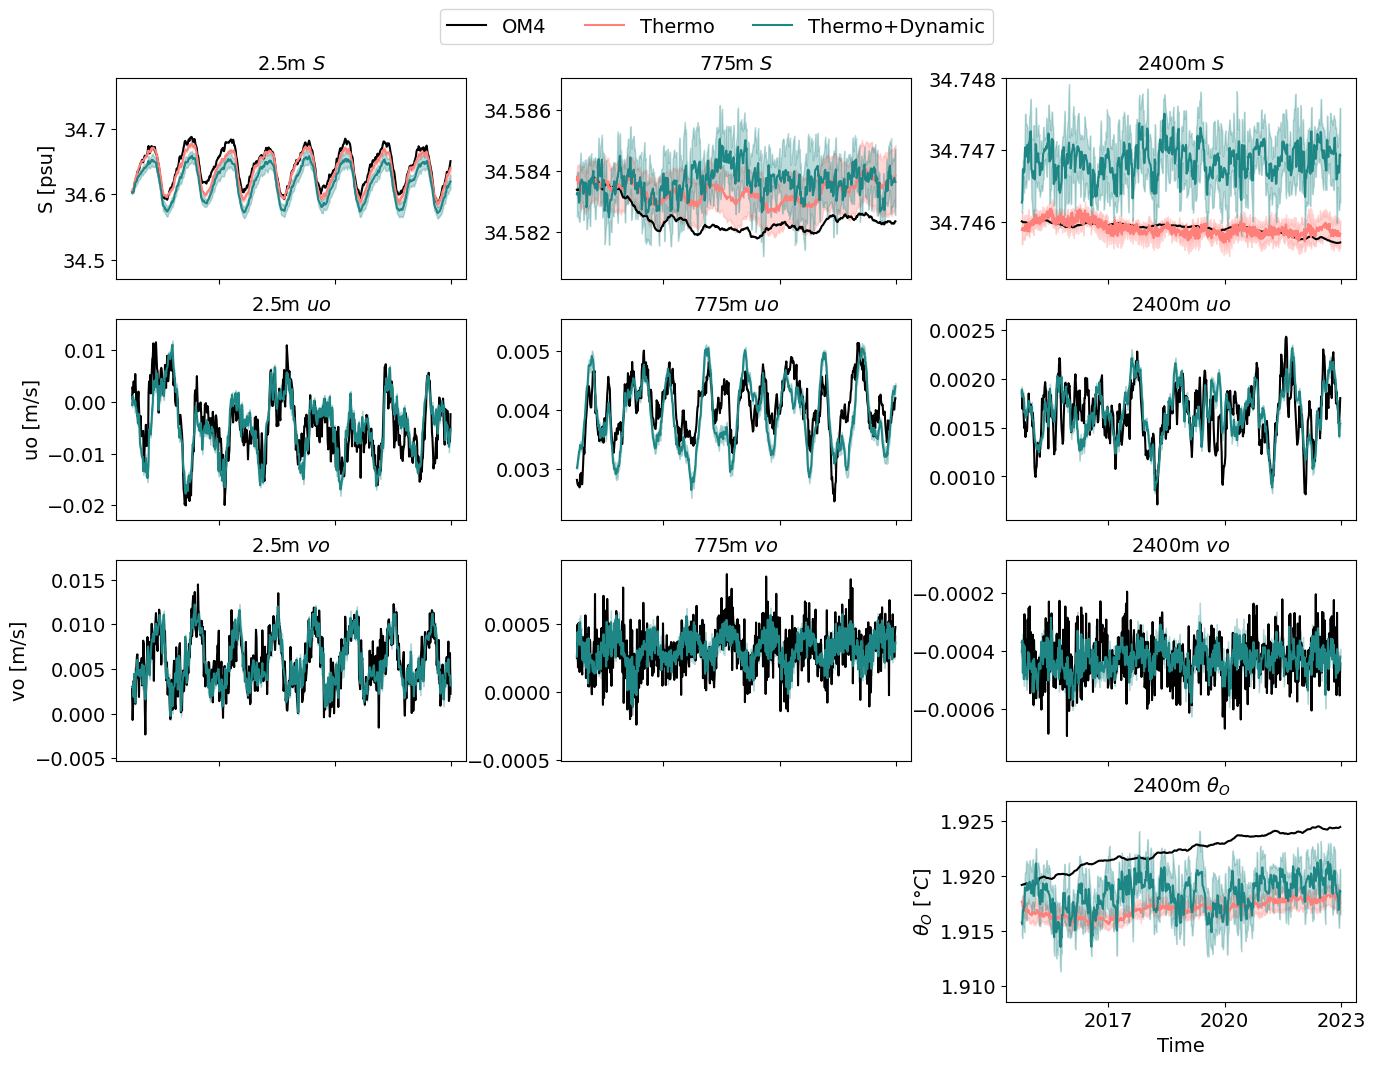

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

shallow_levels = [2.5, 775, 2400]  # Define shallow depth levels
num_shallow_levels = len(shallow_levels)

plt.rcParams.update({'font.size': 14})

variables = ['so', 'uo', 'vo', 'thetao']  # List of variables for rows: salinity, zonal velocity, meridional velocity
cols = len(shallow_levels)  # Number of columns corresponds to shallow levels
rows = len(variables)  # One row per variable

fig, axes = plt.subplots(rows, cols, figsize=(16, 12), gridspec_kw={'wspace': 0.27, 'hspace': 0.2})# Adjust figure size for more rows
axes = axes.reshape(rows, cols)  # Reshape axes for easy access by row and column

# Define labels for each variable
var_labels = {'so': 'S [psu]', 'uo': 'uo [m/s]', 'vo': 'vo [m/s]', 'thetao': r'$\theta_O$ [$\degree C$]'}


# Helper function to calculate mean and std across seeds
def compute_mean_std(predictions):
    stacked = np.stack(predictions, axis=0)
    return np.mean(stacked, axis=0), np.std(stacked, axis=0)

# Loop over each variable and plot profiles for each shallow level
for row_idx, var in enumerate(variables):
    for col_idx, lev in enumerate(shallow_levels):
        ax = axes[row_idx, col_idx]  # Access subplot by row and column
        
        if var == 'thetao' and (lev == 2.5 or lev == 775):
            fig.delaxes(ax)
            continue

        # Ground truth plot for each variable at the specified level
        profile_groundtruth[var].sel(lev=lev).plot(ax=ax, label='OM4', c='k')

        # Collect predictions across seeds
        
        if var not in ['uo', 'vo']:
            slow_predictions = [
                pred_dict[k]["profile_prediction"][var].sel(lev=lev).values
                for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo"
            ]
            slow_mean_pred, slow_std_pred = compute_mean_std(slow_predictions)
        all_predictions = [
            pred_dict[k]["profile_prediction"][var].sel(lev=lev).values
            for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo_dynamic"
        ]
        
        all_mean_pred, all_std_pred = compute_mean_std(all_predictions)

        # Plot mean line and fill standard deviation
        times = profile_groundtruth[var].time.values
        
        if var not in ['uo', 'vo']:
            ax.plot(times, slow_mean_pred, label='Thermo', c=clist[0])
            ax.fill_between(times, slow_mean_pred - slow_std_pred, slow_mean_pred + slow_std_pred, color=clist[0], alpha=0.3)

        ax.plot(times, all_mean_pred, label='Thermo+Dynamic', c=clist[1])
        ax.fill_between(times, all_mean_pred - all_std_pred, all_mean_pred + all_std_pred, color=clist[1], alpha=0.3)

        # Adjust y-axis limits based on the variable
        if var not in ['uo', 'vo']:
            mins = min(slow_mean_pred.min(), all_mean_pred.min())
            maxs = max(slow_mean_pred.max(), all_mean_pred.max())
        else:
            mins = all_mean_pred.min()
            maxs = all_mean_pred.max()
            
        if var == 'thetao':
            if lev > 2000:
                ax.set_ylim(mins - 0.005, maxs + 0.005)
            elif lev > 100:
                ax.set_ylim(mins - 0.01, maxs + 0.01)
            else:
                ax.set_ylim(mins - 0.25, maxs + 0.25)
            ax.set_title(f"{lev}m "+r'$\theta_O$', fontsize=14)
        elif var == 'so':  # Salinity
            if lev > 2000:
                ax.set_ylim(mins - 0.0005, maxs + 0.0005)
            elif lev > 100:
                ax.set_ylim(mins - 0.002, maxs + 0.002)
            else:
                ax.set_ylim(mins - 0.1, maxs + 0.1)
            ax.set_title(f"{lev}m $S$", fontsize=14)
            handles, labels = ax.get_legend_handles_labels()
        elif var == 'uo':  # Zonal velocity
            if lev > 2000:
                ax.set_ylim(mins - 0.0003, maxs + 0.0003)
            elif lev > 100:
                ax.set_ylim(mins - 0.0005, maxs + 0.0005)
            else:
                ax.set_ylim(mins - 0.005, maxs + 0.005)
            ax.set_title(f"{lev}m $uo$", fontsize=14)
        elif var == 'vo':  # Meridional velocity
            if lev > 2000:
                ax.set_ylim(mins - 0.0002, maxs + 0.0002)
            elif lev > 100:
                ax.set_ylim(mins - 0.0004, maxs + 0.0004)
            else:
                ax.set_ylim(mins - 0.005, maxs + 0.005)
            ax.set_title(f"{lev}m $vo$", fontsize=14)


        # ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

        # Set y-axis label only on the leftmost column
        if col_idx == 0 or var == 'thetao':
            ax.set_ylabel(var_labels[var])  # Set y-axis label based on variable
        else:
            ax.set_ylabel("")
            # ax.set_yticklabels([])  # Hide y-axis tick labels for other columns

        # Set x-axis label and ticks only on the bottommost row
        if row_idx == rows - 1:
            ax.set_xlabel('Time')
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([]) 
        

# Adjust layout to avoid overlap and place the legend outside the plot
# fig.tight_layout(rect=[0, 0, 0.85, 0.96])

# Create a single legend for all plots
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.90), ncols=3)

# Save the figure with an updated filename
output_file = os.path.join(output_path, "timeseries_grid_shallow_mean_std_all_vars.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600)

#### Figure S1

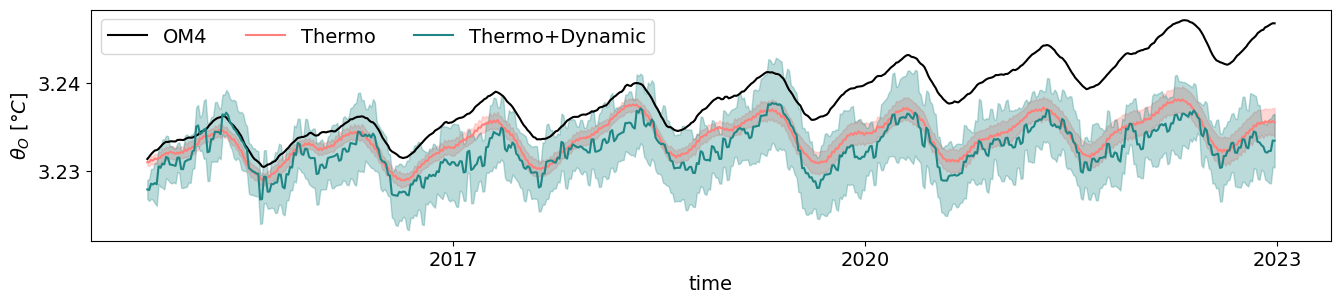

In [17]:
var = 'thetao'
Days_to_Eq = 0

plt.rcdefaults()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1,1,figsize=(16,3),gridspec_kw={'wspace': 0.25,'hspace':.5})

thetao = ds_groundtruth['thetao'].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev'])    
thetao = thetao.rename(r'$\theta_O$')
thetao = thetao.assign_attrs(units = r'$\degree C$')

slow_predictions = [
        pred_dict[k]["ds_prediction"][var].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev']).values
        for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo"
    ]
slow_mean_pred, slow_std_pred = compute_mean_std(slow_predictions)
all_predictions = [
    pred_dict[k]["ds_prediction"][var].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev']).values
    for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo_dynamic"
]
all_mean_pred, all_std_pred = compute_mean_std(all_predictions)

thetao.plot(ax=ax, label='OM4', c='k')
coeffs_OHC_ground_trend= np.polyfit(np.arange(thetao[Days_to_Eq:].size), thetao[Days_to_Eq:], 1)
coeffs_slow_trend= np.polyfit(np.arange(slow_mean_pred[Days_to_Eq:].size), slow_mean_pred[Days_to_Eq:], 1)
coeffs_all_trend= np.polyfit(np.arange(all_mean_pred[Days_to_Eq:].size), all_mean_pred[Days_to_Eq:], 1)

times = thetao.time.values

ax.plot(times, slow_mean_pred, label='Thermo', c=clist[0])
ax.fill_between(times, slow_mean_pred - slow_std_pred, slow_mean_pred + slow_std_pred, color=clist[0], alpha=0.3)

ax.plot(times, all_mean_pred, label='Thermo+Dynamic', c=clist[1])
ax.fill_between(times, all_mean_pred - all_std_pred, all_mean_pred + all_std_pred, color=clist[1], alpha=0.3)

ax.legend(ncol=3)
# ax.set_ylim([3.230, 3.245])
plt.savefig(os.path.join(output_path, f"Global_Thetao_Timeseries"), bbox_inches='tight', dpi=600)
# plt.show()

#### Figure S5

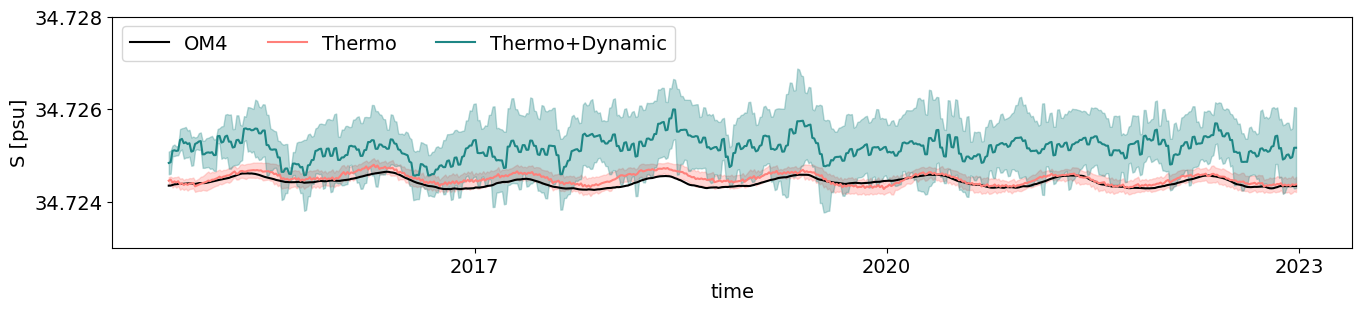

In [19]:
from matplotlib.ticker import ScalarFormatter
var = 'so'

plt.rcdefaults()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1,1,figsize=(16,3),gridspec_kw={'wspace': 0.25,'hspace':.5})

salinity = ds_groundtruth['so'].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev'])    
salinity = salinity.rename('S')
salinity = salinity.assign_attrs(units = 'psu')

slow_predictions = [
        pred_dict[k]["ds_prediction"][var].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev']).values
        for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo"
    ]
slow_mean_pred, slow_std_pred = compute_mean_std(slow_predictions)
all_predictions = [
    pred_dict[k]["ds_prediction"][var].weighted(ds_groundtruth['areacello']*ds_groundtruth['dz']).mean(['x','y','lev']).values
    for k in pred_dict.keys() if pred_dict[k]["mode"]=="thermo_dynamic"
]
all_mean_pred, all_std_pred = compute_mean_std(all_predictions)

salinity.plot(ax=ax, label='OM4', c='k')

times = salinity.time.values

ax.plot(times, slow_mean_pred, label='Thermo', c=clist[0])
ax.fill_between(times, slow_mean_pred - slow_std_pred, slow_mean_pred + slow_std_pred, color=clist[0], alpha=0.3)

ax.plot(times, all_mean_pred, label='Thermo+Dynamic', c=clist[1])
ax.fill_between(times, all_mean_pred - all_std_pred, all_mean_pred + all_std_pred, color=clist[1], alpha=0.3)

ax.legend(ncol=3, loc='upper left')
ax.set_ylim([34.723, 34.728])
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.savefig(os.path.join(output_path, f"Global_Salinity_Timeseries"), bbox_inches='tight', dpi=600)
# plt.show()

#### RMSE Computation

In [ ]:
# Loop over each seed in pred_dict
with ProgressBar():
    for k in pred_dict:
        ds_pred = pred_dict[k]["ds_prediction"]
        pred_dict[k]["Full_RMSE"] = {}
        # Compute RMSE for each variable
        for var in ds_pred.data_vars:
            print(k, var)
            # Ensure the variable exists in ground truth
            if var in ds_groundtruth:
                # Compute RMSE
                error = (ds_pred[var] - ds_groundtruth[var]).compute()
                # error = error.mean(dim="time").compute()
                mse = (error ** 2).compute()
                if "lev" in mse.coords:
                    mse_areaweighted = mse.weighted(ds_groundtruth.areacello * ds_groundtruth.dz).mean(["x", "y", "lev"]).compute()
                else:
                    mse_areaweighted = mse.weighted(ds_groundtruth.areacello).mean(["x", "y"]).compute()
                rmse = np.sqrt(mse_areaweighted)
                rmse = rmse.mean()
                # Store RMSE in the dictionary
                pred_dict[k]["Full_RMSE"][var] = rmse.item()

In [ ]:

# Initialize an empty list to store the RMSE data for each key
rmse_data = []

# Loop through each key in pred_dict and extract the RMSE values
for k in pred_dict.keys():
    # Extract the RMSE values
    rmse_values = pred_dict[k]["Full_RMSE"]
    # Append the key and RMSE values as a dictionary to the list
    d = {}
    d['name'] = pred_dict[k]["name"]
    for var in pred_dict[k]["ls"]:
        d[var] = rmse_values[var]
    rmse_data.append(d)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rmse_data)

# Save the DataFrame to a CSV file
csv_path = 'rmse_values.csv'
df.to_csv(os.path.join(output_path, csv_path), index=False)

print(f"RMSE values saved to {csv_path}")

#### RMSE Plots

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Replace with appropriate csv paths
slow_seeds_rmse_csv_path = '/pscratch/sd/s/suryad/Ocean_Emulator/outputs/2024-11-11_HFDS_HFDS_Anoms_Slow_Seed1_Seed2_Seed3_Seed4_Seed5/rmse_values.csv'
slow_seeds_rmse_dict = pd.read_csv(slow_seeds_rmse_csv_path).to_dict(orient='records')

all_seeds_rmse_csv_path = '/pscratch/sd/s/suryad/Ocean_Emulator/outputs/2024-11-11_HFDS_HFDS_Anoms_All_Seed1_Seed2_Seed3_Seed4_Seed5/rmse_values.csv'
all_seeds_rmse_dict = pd.read_csv(all_seeds_rmse_csv_path).to_dict(orient='records')

slow_pertubdate_rmse_csv_path = '/pscratch/sd/s/suryad/Ocean_Emulator/outputs/2024-11-11_HFDS_HFDS_Anoms_Slow_PertubDates_2014-10-10_2014-04-13/rmse_values.csv'
slow_pertubdate_rmse_dict = pd.read_csv(slow_pertubdate_rmse_csv_path).to_dict(orient='records')

all_pertubdate_rmse_csv_path = '/pscratch/sd/s/suryad/Ocean_Emulator/outputs/2024-11-11_HFDS_HFDS_Anoms_All_PertubDates_2014-10-10_2014-04-13/rmse_values.csv'
all_pertubdate_rmse_dict = pd.read_csv(all_pertubdate_rmse_csv_path).to_dict(orient='records')

#### Figure 1c)

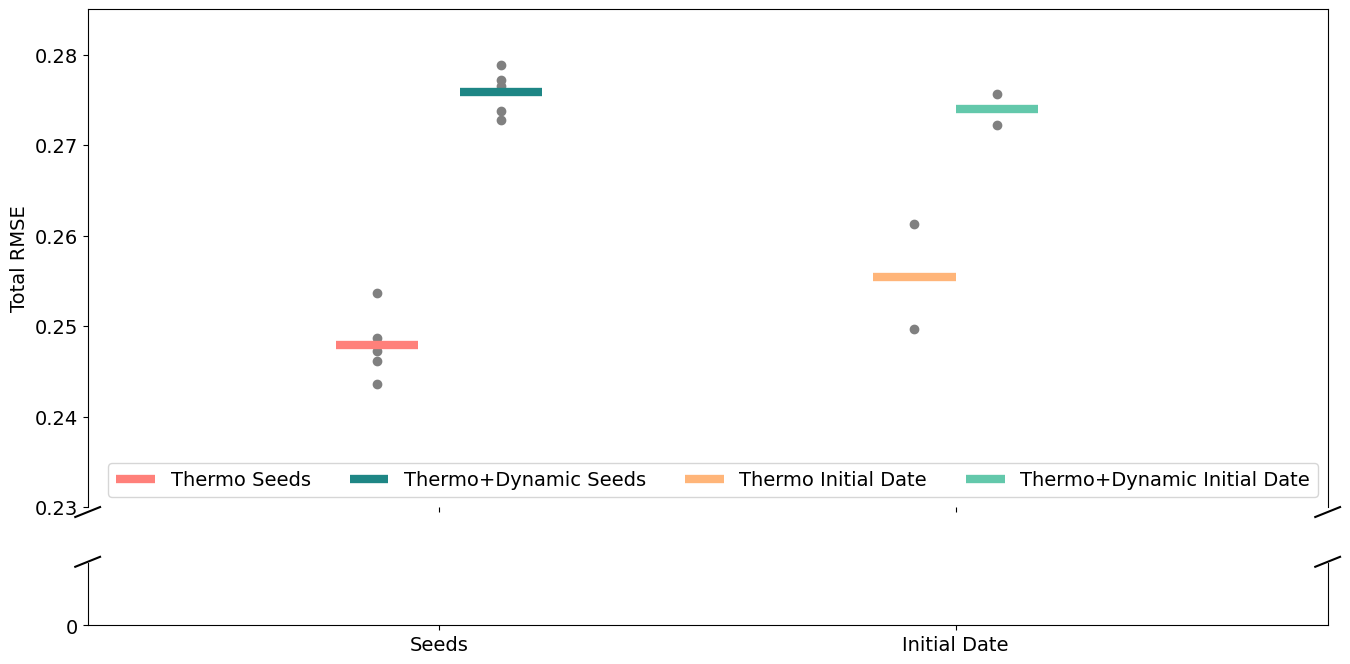

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def get_total_rmse(data):
    # Calculate total RMSE for each seed
    for entry in data:
        try:
            entry['total_rmse'] = entry['thetao'] + entry['so'] + entry['zos'] + entry['uo'] + entry['vo']
        except:
            entry['total_rmse'] = entry['thetao'] + entry['so'] + entry['zos']

    # Extract total RMSE values and labels
    total_rmse_vals = [d['total_rmse'] for d in data]
    seeds = [d['name'] for d in data]
    
    return total_rmse_vals, seeds

# Create figure and subplots for broken y-axis
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8), gridspec_kw={'height_ratios': [8, 1]})

# Set the y-limits for each subplot
ax1.set_ylim(0.23, 0.285)  # Upper range
ax2.set_ylim(0, 0.1)      # Lower range
ax2.set_yticks([0])  # Set only one tick
ax2.set_yticklabels(['0'])  # Label it as '0'

# Hide the spines between the two subplots
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)  # Disable top ticks for upper plot
ax2.tick_params(labelbottom=True)  # Enable bottom ticks for lower plot

# Create diagonal lines to indicate the break
d = 0.01  # Size of the diagonal line
kwargs = dict(color='k', clip_on=False)

# Top plot diagonal lines
ax1.plot([-d, +d], [-d-0.01, +d-0.01], transform=ax1.transAxes, **kwargs)  # Top-left diagonal
ax1.plot([1 - d, 1 + d], [-d-0.01, +d-0.01], transform=ax1.transAxes, **kwargs)  # Top-right diagonal

# Bottom-left and bottom-right diagonals with increased slope
ax2.plot([-d, +d], [-d-0.11, + d-0.11], transform=ax1.transAxes, **kwargs)  # Bottom-left diagonal
ax2.plot([1 - d, 1 + d], [-d-0.11, + d-0.11], transform=ax1.transAxes, **kwargs)  # Bottom-right diagonaliagonal

# Plot data on both subplots
# Slow - Seeds
total_rmse_vals_slow, seeds = get_total_rmse(slow_seeds_rmse_dict)
mean_rmse_slow = np.mean(total_rmse_vals_slow)
x = 0.7
for value in total_rmse_vals_slow:
    if value > 0.23:
        ax1.scatter(x, value, color='gray')
    else:
        ax2.scatter(x, value, color='gray')
ax1.hlines(mean_rmse_slow, x - 0.1, x + 0.1, colors='#ff807a', linewidth=6, label='Thermo Seeds')

# All - Seeds
total_rmse_vals_all, seeds = get_total_rmse(all_seeds_rmse_dict)
mean_rmse_slow = np.mean(total_rmse_vals_all)
x = 1.0
for value in total_rmse_vals_all:
    if value > 0.23:
        ax1.scatter(x, value, color='gray')
    else:
        ax2.scatter(x, value, color='gray')
ax1.hlines(mean_rmse_slow, x - 0.1, x + 0.1, colors='#1e8685', linewidth=6, label='Thermo+Dynamic Seeds')

# Slow - Pertub Date
total_rmse_vals_slow_perturb, seeds = get_total_rmse(slow_pertubdate_rmse_dict)
mean_rmse_slow = np.mean(total_rmse_vals_slow_perturb)
x = 2.0
for value in total_rmse_vals_slow_perturb:
    if value > 0.23:
        ax1.scatter(x, value, color='gray')
    else:
        ax2.scatter(x, value, color='gray')
ax1.hlines(mean_rmse_slow, x - 0.1, x + 0.1, colors='#ffb579', linewidth=6, label='Thermo Initial Date')

# All - Pertub Date
total_rmse_vals_all_perturb, seeds = get_total_rmse(all_pertubdate_rmse_dict)
mean_rmse_slow = np.mean(total_rmse_vals_all_perturb)
x = 2.2
for value in total_rmse_vals_all_perturb:
    if value > 0.23:
        ax1.scatter(x, value, color='gray')
    else:
        ax2.scatter(x, value, color='gray')
ax1.hlines(mean_rmse_slow, x - 0.1, x + 0.1, colors='#63c8ab', linewidth=6, label='Thermo+Dynamic Initial Date')

# Adjust x-axis to have only one tick
ax2.set_xticks([0.85, 2.1])
ax2.set_xticklabels(['Seeds', 'Initial Date'])
ax2.set_xlim(0, 3)
ax1.set_ylabel('Total RMSE')
ax1.legend(loc="lower right", ncol=4)

# Save or display the plot
plt.savefig("RMSE", bbox_inches='tight', dpi=600)
# plt.show()